In [0]:
from google.colab import drive

In [0]:
NUM_CLASSES = 8
classes_list = ['hello', 'goodbye', 'please', 'thank you', 'my', 'name', 'is', 'spock']

In [35]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [0]:
from tensorflow.keras import models, layers
import cv2

In [0]:
from keras.utils import to_categorical
def load_data(dir: str, classes: int):
  count = 0
  count1 = 0
  X = []
  y = []
  for i in range(classes):
    print(f"Searnching for class-{i}")
    for j in os.listdir(f'{dir}/data/gesture-{i}/'):
      if j.endswith('.jpg'):
        count += 1
        count1 += 1
        if count %100 == 0:
          print(count)
        img = Image.open(f'{dir}/data/gesture-{i}/{j}').convert('L')
        img = img.resize((128, 128))
        arr = np.array(img)
        X.append(arr)
        y.append(i)
  
  X = np.array(X, dtype = 'float64')
  X = X.reshape(len(y), 128, 128, 1)
  y_data = np.array(y)
  return X/255, y_data

In [42]:
X, y = load_data('drive/My Drive', NUM_CLASSES)

Searnching for class-0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
Searnching for class-1
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
Searnching for class-2
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
Searnching for class-3
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
Searnching for class-4
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
Searnching for class-5
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
Searnching for class-6
15700
15800

In [43]:
np.zeros((1, 1))

array([[0.]])

In [44]:
X.shape

(20869, 128, 128, 1)

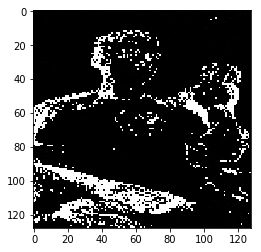

In [45]:
plt.imshow(X[-3, :, :, 0], cmap='gray')

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_further,y_train,y_further = train_test_split(X,y,test_size = 0.2)
X_validate,X_test,y_validate,y_test = train_test_split(X_further,y_further,test_size = 0.5)


In [47]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(128, 128, 1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [48]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(X_validate, y_validate))

Train on 16695 samples, validate on 2087 samples
Epoch 1/10
16695/16695 [==============================] - 8s 479us/sample - loss: 0.2437 - acc: 0.9209 - val_loss: 0.0115 - val_acc: 0.9971
Epoch 2/10
16695/16695 [==============================] - 4s 212us/sample - loss: 0.0121 - acc: 0.9965 - val_loss: 0.0043 - val_acc: 0.9990
Epoch 3/10
16695/16695 [==============================] - 4s 216us/sample - loss: 0.0066 - acc: 0.9984 - val_loss: 0.0013 - val_acc: 0.9995
Epoch 4/10
16695/16695 [==============================] - 4s 211us/sample - loss: 0.0030 - acc: 0.9991 - val_loss: 0.0029 - val_acc: 0.9995
Epoch 5/10
16695/16695 [==============================] - 4s 211us/sample - loss: 0.0051 - acc: 0.9990 - val_loss: 9.8481e-04 - val_acc: 0.9995
Epoch 6/10
16695/16695 [==============================] - 3s 208us/sample - loss: 0.0019 - acc: 0.9995 - val_loss: 1.2858e-04 - val_acc: 1.0000
Epoch 7/10
16695/16695 [==============================] - 4s 212us/sample - loss: 0.0017 - acc: 0.9997 

In [0]:
import datetime
model.save(f'drive/My Drive/Colab Notebooks/{datetime.datetime.now()}.h5')

In [50]:
model.evaluate(X_test, y_test, verbose=1)

2087/2087 [==============================] - 0s 171us/sample - loss: 0.0030 - acc: 0.9986


[0.003018954209130474, 0.9985625]